In [1]:
import numpy as np
from scipy.special import genlaguerre
from scipy.special import factorial
from scipy.integrate import quad
import matplotlib.pyplot as plt

Define Lagurre poltnomial $L^{1}_{n-1}$ as defined in Griffiths 2ed Table 4.6

In [2]:
def laguerre_comp(n):
    return (-1)**(n+1) * genlaguerre(n,0, monic=True).deriv()

Define $p_n$ as derived in assignment

In [3]:
def integrand(x, n):
     return np.exp(-(1+2/n)*x)*x**2 * laguerre_comp(n)(4*x/n)

def pn(n):
    return 4*(4/n)**3 * factorial(n-1) / (2*n*factorial(n)**3) \
            * quad(integrand, 0, np.inf, args=n)[0]**2
    

# Part A

Prob of being in $n=2$ state after decay

In [4]:
pn(2)

0.25

Prob of being in $n=3$ state after decay

In [5]:
pn(3)

0.012740198399999928

# Part B

Obtain some values for $p_n$ for various $n$

In [6]:
ns = np.arange(1,70,1)
pns = np.array([pn(n) for n in range(1,70)])
pns_cumulative = np.cumsum(pns)

Plot cumulative probability sum.

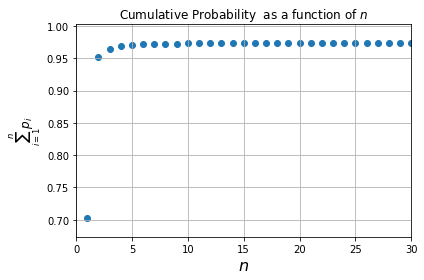

In [7]:
plt.scatter(ns, pns_cumulative)
plt.xlabel('$n$', fontsize=16)
plt.ylabel('$\sum_{i=1}^n p_i$', fontsize=12)
plt.xlim(0,30)
plt.grid()
plt.title('Cumulative Probability  as a function of $n$')
plt.tight_layout()

In [8]:
pns_cumulative[-1]

0.9737093948301515

The cumulative probability seems to converge at $0.974$. This means that the $\psi_{100}$ cannot be expressed as a linear combination of $\psi'_{nlm}$ states. This suggests that there is a $2.6\%$ probability of observing something else: this would be the electron in a non-bound state (electron ejected from the atom).